## Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Create_Dataset import create_dataset
import cv2 
from keras.utils import image_dataset_from_directory

ModuleNotFoundError: No module named 'cv2'

In [18]:
%run Create_Dataset

## Reading the data

In [19]:
data = 'C:\\Users\\Aship\\Downloads\\data'
x_train, x_test, y_train, y_test, d = create_dataset(data)

## EDA - Exploratory Data Analysis

## Training  - CNN

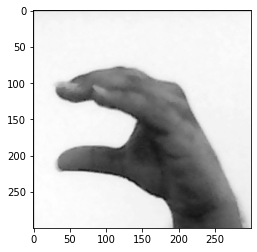

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [21]:
image = x_train[3]
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


# show the image
plt.imshow(image, cmap='gray')
plt.show()
print(y_train[3])

In [69]:
main_directory = 'C:\\Users\\Aship\\Downloads\\data'
image_dataset_from_directory(main_directory, 
    labels='inferred',
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(300, 300),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,)

Found 8100 files belonging to 27 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [90]:
## imports for the model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.activations import relu, sigmoid, softmax
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy


model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation=relu, input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation=relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation=relu))
loss_function = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='Adam', loss=loss_function, metrics=['accuracy'])


In [52]:
# ytrain_test = np.where(y_train == 1)[1].astype('uint8')

# ytrain_test = np.expand_dims(ytrain_test, axis=1)
# ytrain_test.shape

(5427, 1)

In [62]:
# ytrain_test = [x.astype('uint8') for x in ytrain_test]
# ytrain_test = np.array(ytrain_test)


In [91]:
model.fit(x_train, ytrain_test, epochs=3)



Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\asyncio\windows_events.py", line 316, in run_forever
      super().run_forever()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-91-5a4f5b229981>", line 1, in <module>
      model.fit(x_train, ytrain_test, epochs=3)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\Aship\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 26 which is outside the valid range of [0, 1).  Label values: 22 21 12 2 24 16 20 15 26 8 13 11 13 2 0 3 7 15 19 16 14 23 12 25 20 20 20 26 9 18 26 8
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_8410]

## Testing and Evaluation

## OpenCV and using computor vision